In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
nba_shots_Chicago_="shot log CHI.csv"

In [3]:
Chicago_shots=pd.read_csv(nba_shots_Chicago_)
Chicago_shots

,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,location y,time,date,shoot player,time from last shot,quarter,current shot outcome
0,NaN,SG,Yes,239.0,NaN,CHI,Jump Shot,2,BOS,169.0,0:17,2016-10-27,Dwyane Wade,NaN,1,SCORED
1,SCORED,PF,Yes,64.0,MISSED,CHI,Hook Shot,2,BOS,215.0,1:08,2016-10-27,Taj Gibson,51.0,1,MISSED
2,MISSED,PG,Yes,67.0,MISSED,CHI,Driving Layup,2,BOS,259.0,1:15,2016-10-27,Rajon Rondo,7.0,1,MISSED
3,MISSED,C,Yes,102.0,MISSED,CHI,Hook Shot,2,BOS,243.0,1:27,2016-10-27,Robin Lopez,12.0,1,MISSED
4,MISSED,SG,Yes,241.0,SCORED,CHI,Jump Shot,2,BOS,210.0,1:57,2016-10-27,Dwyane Wade,30.0,1,MISSED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,640.0,MISSED,CHI,Jump Shot,3,BRO,212.0,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED
7135,SCORED,G,Yes,675.0,MISSED,CHI,Jump Shot,3,BRO,113.0,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED
7136,MISSED,SG,Yes,848.0,SCORED,CHI,Jump Shot,2,BRO,112.0,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED
7137,SCORED,PF,Yes,691.0,MISSED,CHI,Jump Shot,3,BRO,99.0,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED


In [4]:
newChicagodata1=Chicago_shots.dropna()
newChicagodata1.isnull().sum()

self previous shot        0
player position           0
home game                 0
location x                0
opponent previous shot    0
home team                 0
shot type                 0
points                    0
away team                 0
location y                0
time                      0
date                      0
shoot player              0
time from last shot       0
quarter                   0
current shot outcome      0
dtype: int64

In [5]:
newChicagodata = newChicagodata1.rename(columns={"player position":"POSITION","location x": "LOC_X", "location y": "LOC_Y", "shoot player":"PLAYER_NAME","current shot outcome":"EVENT_TYPE"})
newChicagodata

,self previous shot,POSITION,home game,LOC_X,opponent previous shot,home team,shot type,points,away team,LOC_Y,time,date,PLAYER_NAME,time from last shot,quarter,EVENT_TYPE
1,SCORED,PF,Yes,64.0,MISSED,CHI,Hook Shot,2,BOS,215.0,1:08,2016-10-27,Taj Gibson,51.0,1,MISSED
2,MISSED,PG,Yes,67.0,MISSED,CHI,Driving Layup,2,BOS,259.0,1:15,2016-10-27,Rajon Rondo,7.0,1,MISSED
3,MISSED,C,Yes,102.0,MISSED,CHI,Hook Shot,2,BOS,243.0,1:27,2016-10-27,Robin Lopez,12.0,1,MISSED
4,MISSED,SG,Yes,241.0,SCORED,CHI,Jump Shot,2,BOS,210.0,1:57,2016-10-27,Dwyane Wade,30.0,1,MISSED
5,MISSED,SG,Yes,239.0,SCORED,CHI,Pullup Jump Shot,2,BOS,351.0,2:10,2016-10-27,Jimmy Butler,13.0,1,MISSED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,640.0,MISSED,CHI,Jump Shot,3,BRO,212.0,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED
7135,SCORED,G,Yes,675.0,MISSED,CHI,Jump Shot,3,BRO,113.0,10:13,2017-04-12,Denzel Valentine,31.0,4,MISSED
7136,MISSED,SG,Yes,848.0,SCORED,CHI,Jump Shot,2,BRO,112.0,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED
7137,SCORED,PF,Yes,691.0,MISSED,CHI,Jump Shot,3,BRO,99.0,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED


In [6]:
newChicagodata['EVENT_TYPE'].unique()

array(['MISSED', 'SCORED', 'BLOCKED'], dtype=object)

In [7]:
print("Total made shots{}".format(newChicagodata[newChicagodata['EVENT_TYPE'] == 'SCORED'].shape))
print("Total missed shots{}".format(newChicagodata[newChicagodata['EVENT_TYPE'] == 'MISSED'].shape))
print("Total blocked shots{}".format(newChicagodata[newChicagodata['EVENT_TYPE'] == 'BLOCKED'].shape))

Total made shots(3026, 16)
Total missed shots(3390, 16)
Total blocked shots(368, 16)


In [8]:
newChicagodata['shot type'].unique()

array(['Hook Shot', 'Driving Layup', 'Jump Shot', 'Pullup Jump Shot',
       'Driving Bank Shot', 'Tip Layup Shot', 'Cutting Dunk Shot',
       'Turnaround Hook Shot', 'Driving Reverse Layup', 'Reverse Dunk',
       'Turnaround Jump Shot', 'Alley Oop Dunk',
       'Driving Floating Jump Shot', 'Layup', 'Putback Layup',
       'Alley Oop Layup', 'Reverse Layup', 'Step Back Jump Shot',
       'Running Layup', 'Turnaround Fadeaway Shot', 'Floating Jump Shot',
       'Driving Finger Roll Layup', 'Dunk', 'Fadeaway Jumper',
       'Turnaround Fadeaway', 'Running Jump Shot', 'Cutting Layup Shot',
       'Turnaround Fadeaway Bank Jump Shot', 'Finger Roll Layup',
       'Jump Bank Shot', 'Putback Dunk', 'Driving Hook Shot',
       'Driving Dunk', 'Running Finger Roll Layup', 'Running Dunk',
       'Driving Floating Bank Jump Shot', 'Fadeaway Bank Shot',
       'Running Pull-Up Jump Shot', 'Turnaround Bank Shot',
       'Running Alley Oop Dunk Shot', 'Driving Bank Hook Shot',
       'Turnaround 

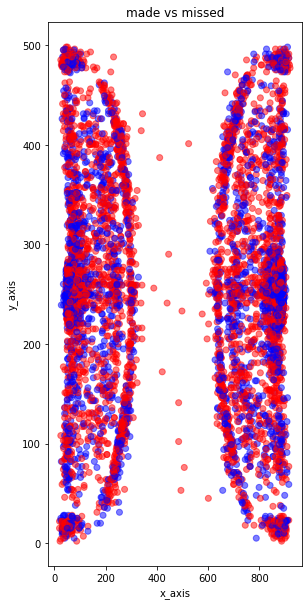

In [9]:
#visulization of what the current data looks like for shits and 
plt.figure(figsize=(10,10))

colors = np.where(newChicagodata['EVENT_TYPE']=='SCORED',"blue","red");
colors.shape
plt.subplot(121)
plt.title('made vs missed')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.scatter(newChicagodata.LOC_X,newChicagodata.LOC_Y,color=colors,alpha=0.5)

In [10]:
shots_taken_groups = newChicagodata.groupby('shot type')
for column, frame in shots_taken_groups:
    print('Column: {0}, Frame: {1}'.format(column, len(frame)))

Column: Alley Oop Dunk, Frame: 36
Column: Alley Oop Layup, Frame: 35
Column: Cutting Dunk Shot, Frame: 45
Column: Cutting Finger Roll Layup Shot, Frame: 9
Column: Cutting Layup Shot, Frame: 103
Column: Driving Bank Hook Shot, Frame: 3
Column: Driving Bank Shot, Frame: 28
Column: Driving Dunk, Frame: 36
Column: Driving Finger Roll Layup, Frame: 55
Column: Driving Floating Bank Jump Shot, Frame: 30
Column: Driving Floating Jump Shot, Frame: 131
Column: Driving Hook Shot, Frame: 51
Column: Driving Layup, Frame: 473
Column: Driving Reverse Layup, Frame: 88
Column: Dunk, Frame: 84
Column: Fadeaway Bank Shot, Frame: 8
Column: Fadeaway Jumper, Frame: 156
Column: Finger Roll Layup, Frame: 16
Column: Floating Jump Shot, Frame: 151
Column: Hook Bank Shot, Frame: 5
Column: Hook Shot, Frame: 187
Column: Jump Bank Shot, Frame: 41
Column: Jump Shot, Frame: 3147
Column: Layup, Frame: 508
Column: Pullup Bank Shot, Frame: 13
Column: Pullup Jump Shot, Frame: 340
Column: Putback Dunk, Frame: 19
Column: P

In [11]:
changedmissed = newChicagodata.replace(to_replace = "MISSED", value = "0")
changedmissed

,self previous shot,POSITION,home game,LOC_X,opponent previous shot,home team,shot type,points,away team,LOC_Y,time,date,PLAYER_NAME,time from last shot,quarter,EVENT_TYPE
1,SCORED,PF,Yes,64.0,0,CHI,Hook Shot,2,BOS,215.0,1:08,2016-10-27,Taj Gibson,51.0,1,0
2,0,PG,Yes,67.0,0,CHI,Driving Layup,2,BOS,259.0,1:15,2016-10-27,Rajon Rondo,7.0,1,0
3,0,C,Yes,102.0,0,CHI,Hook Shot,2,BOS,243.0,1:27,2016-10-27,Robin Lopez,12.0,1,0
4,0,SG,Yes,241.0,SCORED,CHI,Jump Shot,2,BOS,210.0,1:57,2016-10-27,Dwyane Wade,30.0,1,0
5,0,SG,Yes,239.0,SCORED,CHI,Pullup Jump Shot,2,BOS,351.0,2:10,2016-10-27,Jimmy Butler,13.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,SCORED,G,Yes,640.0,0,CHI,Jump Shot,3,BRO,212.0,9:42,2017-04-12,Denzel Valentine,27.0,4,SCORED
7135,SCORED,G,Yes,675.0,0,CHI,Jump Shot,3,BRO,113.0,10:13,2017-04-12,Denzel Valentine,31.0,4,0
7136,0,SG,Yes,848.0,SCORED,CHI,Jump Shot,2,BRO,112.0,10:39,2017-04-12,Anthony Morrow,26.0,4,SCORED
7137,SCORED,PF,Yes,691.0,0,CHI,Jump Shot,3,BRO,99.0,11:10,2017-04-12,Bobby Portis,31.0,4,SCORED


In [12]:
changedscored = changedmissed.replace(to_replace = "SCORED", value = "1")
changedblocked = changedscored.replace(to_replace = "BLOCKED",value = "2")
formattedChicago = changedblocked
formattedChicago

,self previous shot,POSITION,home game,LOC_X,opponent previous shot,home team,shot type,points,away team,LOC_Y,time,date,PLAYER_NAME,time from last shot,quarter,EVENT_TYPE
1,1,PF,Yes,64.0,0,CHI,Hook Shot,2,BOS,215.0,1:08,2016-10-27,Taj Gibson,51.0,1,0
2,0,PG,Yes,67.0,0,CHI,Driving Layup,2,BOS,259.0,1:15,2016-10-27,Rajon Rondo,7.0,1,0
3,0,C,Yes,102.0,0,CHI,Hook Shot,2,BOS,243.0,1:27,2016-10-27,Robin Lopez,12.0,1,0
4,0,SG,Yes,241.0,1,CHI,Jump Shot,2,BOS,210.0,1:57,2016-10-27,Dwyane Wade,30.0,1,0
5,0,SG,Yes,239.0,1,CHI,Pullup Jump Shot,2,BOS,351.0,2:10,2016-10-27,Jimmy Butler,13.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,1,G,Yes,640.0,0,CHI,Jump Shot,3,BRO,212.0,9:42,2017-04-12,Denzel Valentine,27.0,4,1
7135,1,G,Yes,675.0,0,CHI,Jump Shot,3,BRO,113.0,10:13,2017-04-12,Denzel Valentine,31.0,4,0
7136,0,SG,Yes,848.0,1,CHI,Jump Shot,2,BRO,112.0,10:39,2017-04-12,Anthony Morrow,26.0,4,1
7137,1,PF,Yes,691.0,0,CHI,Jump Shot,3,BRO,99.0,11:10,2017-04-12,Bobby Portis,31.0,4,1


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix,precision_recall_curve
from sklearn.preprocessing import RobustScaler
from sklearn import datasets, linear_model
import random

In [37]:
df = formattedChicago[["LOC_X","LOC_Y","shot type","EVENT_TYPE"]]
df

,LOC_X,LOC_Y,shot type,EVENT_TYPE
1,64.0,215.0,Hook Shot,0
2,67.0,259.0,Driving Layup,0
3,102.0,243.0,Hook Shot,0
4,241.0,210.0,Jump Shot,0
5,239.0,351.0,Pullup Jump Shot,0
...,...,...,...,...
7134,640.0,212.0,Jump Shot,1
7135,675.0,113.0,Jump Shot,0
7136,848.0,112.0,Jump Shot,1
7137,691.0,99.0,Jump Shot,1


In [38]:
data = df.copy()
data_binary_encoder = pd.get_dummies(data,columns=["shot type"])

,LOC_X,LOC_Y,shot type_Alley Oop Dunk,shot type_Alley Oop Layup,shot type_Cutting Dunk Shot,shot type_Cutting Finger Roll Layup Shot,shot type_Cutting Layup Shot,shot type_Driving Bank Hook Shot,shot type_Driving Bank Shot,shot type_Driving Dunk,...,shot type_Step Back Bank Jump Shot,shot type_Step Back Jump Shot,shot type_Tip Layup Shot,shot type_Turnaround Bank Hook Shot,shot type_Turnaround Bank Shot,shot type_Turnaround Fadeaway,shot type_Turnaround Fadeaway Bank Jump Shot,shot type_Turnaround Fadeaway Shot,shot type_Turnaround Hook Shot,shot type_Turnaround Jump Shot
count,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,...,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000
mean,459.522700,254.473762,0.005307,0.005159,0.006633,0.001327,0.015183,0.000442,0.004127,0.005307,...,0.000147,0.016509,0.029481,0.000147,0.002211,0.007223,0.000442,0.007518,0.013414,0.014004
std,352.239094,109.814275,0.072658,0.071647,0.081180,0.036402,0.122288,0.021026,0.064117,0.072658,...,0.012141,0.127433,0.169163,0.012141,0.046974,0.084686,0.021026,0.086384,0.115048,0.117514
min,20.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,848.000000,313.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,920.000000,498.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
data_binary_encoder.columns

Index(['LOC_X', 'LOC_Y', 'EVENT_TYPE', 'shot type_Alley Oop Dunk',
       'shot type_Alley Oop Layup', 'shot type_Cutting Dunk Shot',
       'shot type_Cutting Finger Roll Layup Shot',
       'shot type_Cutting Layup Shot', 'shot type_Driving Bank Hook Shot',
       'shot type_Driving Bank Shot', 'shot type_Driving Dunk',
       'shot type_Driving Finger Roll Layup',
       'shot type_Driving Floating Bank Jump Shot',
       'shot type_Driving Floating Jump Shot', 'shot type_Driving Hook Shot',
       'shot type_Driving Layup', 'shot type_Driving Reverse Layup',
       'shot type_Dunk', 'shot type_Fadeaway Bank Shot',
       'shot type_Fadeaway Jumper', 'shot type_Finger Roll Layup',
       'shot type_Floating Jump Shot', 'shot type_Hook Bank Shot',
       'shot type_Hook Shot', 'shot type_Jump Bank Shot',
       'shot type_Jump Shot', 'shot type_Layup', 'shot type_Pullup Bank Shot',
       'shot type_Pullup Jump Shot', 'shot type_Putback Dunk',
       'shot type_Putback Layup', 'shot 

In [41]:
random.seed(3277)
training,testing = train_test_split(data_binary_encoder,test_size = 0.5)
print(training.shape)
print(testing.shape)

(3392, 50)
(3392, 50)


In [58]:
regr = linear_model.LinearRegression()
training_data = training.drop('EVENT_TYPE', axis = 1)
training_test = training.iloc[:,-1]
print(training_data.shape,training_test.shape)

(3392, 49) (3392,)


In [59]:
lfit = regr.fit(training_data,training_test)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-5.28272711e-20 -5.42101086e-19 -2.12765957e-02 -2.12765957e-02
 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02
 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02
 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02
 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02
 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02
 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02
 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02
 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02
 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02
 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02
 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02 -2.12765957e-02
  9.78723404e-01]


In [74]:
testing_data = testing.loc[:,['LOC_X','LOC_Y','shot type_Alley Oop Dunk',
       'shot type_Alley Oop Layup', 'shot type_Cutting Dunk Shot',
       'shot type_Cutting Finger Roll Layup Shot',
       'shot type_Cutting Layup Shot', 'shot type_Driving Bank Hook Shot',
       'shot type_Driving Bank Shot', 'shot type_Driving Dunk',
       'shot type_Driving Finger Roll Layup',
       'shot type_Driving Floating Bank Jump Shot',
       'shot type_Driving Floating Jump Shot', 'shot type_Driving Hook Shot',
       'shot type_Driving Layup', 'shot type_Driving Reverse Layup',
       'shot type_Dunk', 'shot type_Fadeaway Bank Shot',
       'shot type_Fadeaway Jumper', 'shot type_Finger Roll Layup',
       'shot type_Floating Jump Shot', 'shot type_Hook Bank Shot',
       'shot type_Hook Shot', 'shot type_Jump Bank Shot',
       'shot type_Jump Shot', 'shot type_Layup', 'shot type_Pullup Bank Shot',
       'shot type_Pullup Jump Shot', 'shot type_Putback Dunk',
       'shot type_Putback Layup', 'shot type_Reverse Dunk',
       'shot type_Reverse Layup', 'shot type_Running Alley Oop Dunk Shot',
       'shot type_Running Dunk', 'shot type_Running Finger Roll Layup',
       'shot type_Running Jump Shot', 'shot type_Running Layup',
       'shot type_Running Pull-Up Jump Shot',
       'shot type_Running Reverse Layup', 'shot type_Step Back Bank Jump Shot',
       'shot type_Step Back Jump Shot', 'shot type_Tip Layup Shot',
       'shot type_Turnaround Bank Hook Shot', 'shot type_Turnaround Bank Shot',
       'shot type_Turnaround Fadeaway',
       'shot type_Turnaround Fadeaway Bank Jump Shot',
       'shot type_Turnaround Fadeaway Shot', 'shot type_Turnaround Hook Shot',
       'shot type_Turnaround Jump Shot']]
testing_test = testing[['EVENT_TYPE']].as_matrix()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [106]:
prediction_of_test = regr.predict(testing_data)
prediction_of_test.shape
prediction_of_test.dtype

dtype('float64')

In [114]:
testing_test.shape
testing_test.astype(float)


array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

TypeError: unhashable type: 'numpy.ndarray'

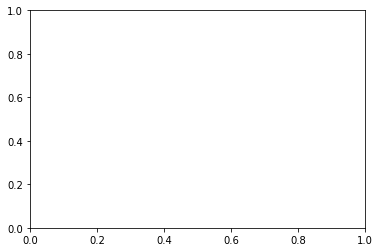

In [115]:
%matplotlib inline
plt.scatter(testing_test,prediction_of_test,color='black')

x0 = min(testing_test)
x1= max (testing_test)

In [26]:
X = formattedChicago[["LOC_X","LOC_Y","shot type"]]
y = formattedChicago[["EVENT_TYPE"]]

In [28]:
data = X.copy()
data_binary_encoder = pd.get_dummies(data,columns=["shot type"])
data_binary_encoder.describe()

,LOC_X,LOC_Y,shot type_Alley Oop Dunk,shot type_Alley Oop Layup,shot type_Cutting Dunk Shot,shot type_Cutting Finger Roll Layup Shot,shot type_Cutting Layup Shot,shot type_Driving Bank Hook Shot,shot type_Driving Bank Shot,shot type_Driving Dunk,...,shot type_Step Back Bank Jump Shot,shot type_Step Back Jump Shot,shot type_Tip Layup Shot,shot type_Turnaround Bank Hook Shot,shot type_Turnaround Bank Shot,shot type_Turnaround Fadeaway,shot type_Turnaround Fadeaway Bank Jump Shot,shot type_Turnaround Fadeaway Shot,shot type_Turnaround Hook Shot,shot type_Turnaround Jump Shot
count,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,...,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000
mean,459.522700,254.473762,0.005307,0.005159,0.006633,0.001327,0.015183,0.000442,0.004127,0.005307,...,0.000147,0.016509,0.029481,0.000147,0.002211,0.007223,0.000442,0.007518,0.013414,0.014004
std,352.239094,109.814275,0.072658,0.071647,0.081180,0.036402,0.122288,0.021026,0.064117,0.072658,...,0.012141,0.127433,0.169163,0.012141,0.046974,0.084686,0.021026,0.086384,0.115048,0.117514
min,20.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,848.000000,313.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,920.000000,498.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
data = X.copy()
data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.describe()

,LOC_X,LOC_Y,shot type_Alley Oop Dunk,shot type_Alley Oop Layup,shot type_Cutting Dunk Shot,shot type_Cutting Finger Roll Layup Shot,shot type_Cutting Layup Shot,shot type_Driving Bank Hook Shot,shot type_Driving Bank Shot,shot type_Driving Dunk,...,shot type_Step Back Bank Jump Shot,shot type_Step Back Jump Shot,shot type_Tip Layup Shot,shot type_Turnaround Bank Hook Shot,shot type_Turnaround Bank Shot,shot type_Turnaround Fadeaway,shot type_Turnaround Fadeaway Bank Jump Shot,shot type_Turnaround Fadeaway Shot,shot type_Turnaround Hook Shot,shot type_Turnaround Jump Shot
count,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,...,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000
mean,459.522700,254.473762,0.005307,0.005159,0.006633,0.001327,0.015183,0.000442,0.004127,0.005307,...,0.000147,0.016509,0.029481,0.000147,0.002211,0.007223,0.000442,0.007518,0.013414,0.014004
std,352.239094,109.814275,0.072658,0.071647,0.081180,0.036402,0.122288,0.021026,0.064117,0.072658,...,0.012141,0.127433,0.169163,0.012141,0.046974,0.084686,0.021026,0.086384,0.115048,0.117514
min,20.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,848.000000,313.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,920.000000,498.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.model_selection import train_test_split

X= pd.get_dummies(X)
robust_scaler = RobustScaler()
y = robust_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9000)

X_train

,LOC_X,LOC_Y,shot type_Alley Oop Dunk,shot type_Alley Oop Layup,shot type_Cutting Dunk Shot,shot type_Cutting Finger Roll Layup Shot,shot type_Cutting Layup Shot,shot type_Driving Bank Hook Shot,shot type_Driving Bank Shot,shot type_Driving Dunk,...,shot type_Step Back Bank Jump Shot,shot type_Step Back Jump Shot,shot type_Tip Layup Shot,shot type_Turnaround Bank Hook Shot,shot type_Turnaround Bank Shot,shot type_Turnaround Fadeaway,shot type_Turnaround Fadeaway Bank Jump Shot,shot type_Turnaround Fadeaway Shot,shot type_Turnaround Hook Shot,shot type_Turnaround Jump Shot
1554,97.0,125.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2340,254.0,393.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6034,298.0,187.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7107,750.0,359.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1199,64.0,392.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,77.0,375.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
361,58.0,228.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4872,107.0,477.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1767,886.0,249.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_test

,LOC_X,LOC_Y,shot type_Alley Oop Dunk,shot type_Alley Oop Layup,shot type_Cutting Dunk Shot,shot type_Cutting Finger Roll Layup Shot,shot type_Cutting Layup Shot,shot type_Driving Bank Hook Shot,shot type_Driving Bank Shot,shot type_Driving Dunk,...,shot type_Step Back Bank Jump Shot,shot type_Step Back Jump Shot,shot type_Tip Layup Shot,shot type_Turnaround Bank Hook Shot,shot type_Turnaround Bank Shot,shot type_Turnaround Fadeaway,shot type_Turnaround Fadeaway Bank Jump Shot,shot type_Turnaround Fadeaway Shot,shot type_Turnaround Hook Shot,shot type_Turnaround Jump Shot
5149,47.0,233.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3352,246.0,421.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7021,843.0,236.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1404,58.0,256.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6133,318.0,326.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,67.0,246.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3061,846.0,174.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
195,706.0,143.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5011,895.0,496.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y_train

array([[-0.26397919, -1.15740741,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.05981795,  1.32407407,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00260078, -0.58333333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.25097529,  2.10185185,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76202861, -0.00925926,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.11573472, -1.72222222,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
y_test

array([[-0.3289987 , -0.15740741,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.07022107,  1.58333333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70611183, -0.12962963,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.52795839, -0.99074074,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77373212,  2.27777778,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.0793238 ,  0.7962963 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [22]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

KeyboardInterrupt: 

In [ ]:
metrics = pd.DataFrame(index = ['accuracy','precision','recall'],
                            columns = ['NULL',"Logitisic",'ClassTree','NaiveBayes'])
metrics.head()

In [ ]:
y_pred_test = np.repeat(y_train,y_test.size)
metrics.loc['accuracy','NULL'] = accuracy_score(y_pred = y_pred_test,y_true = y_test)
metrics.loc['precision','NULL'] = precision_socre(y_pred = y_pred_test,y_true = y_test)
metrics.loc['recall','NULL'] = recall_socre(y_pred = y_pred_test,y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test,y_true = y_test)


In [146]:
r = np.arange(250,5000,250)
r

array([ 250,  500,  750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750,
       3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750])

In [115]:
from sklearn.metrics import make_scorer 
scorer = make_scorer(f1_score,pos_label=None,average='weighted')
